In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import os


D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
geolocation_path = "geolocation.csv"

In [3]:
# Define the directory containing your data
data_dir = "D:/Data Analytics/Data source/extracted_data/Real Estate/"

# Construct the file path using os.path.join
geolocation_path = os.path.join(data_dir, "geolocation.csv")

In [4]:
geolocation_data = pd.read_csv(geolocation_path, delimiter=';')

In [5]:
# Initial assessment of the geolocation dataset

geolocation_data.head()

,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,"34,23948","-116,87991"
1,AIR10178668,2022-12,Round Drive,"34,25095","-116,94139"
2,AIR10211700,2022-12,NaN,"34,24516","-116,87618"
3,AIR10344705,2022-12,NaN,"34,2675","-116,86089"
4,AIR10424683,2022-12,Starvation Flats Road,"34,25341","-116,88025"


In [6]:
geolocation_data.shape

(49311, 5)

In [7]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unified_id   49311 non-null  object
 1   month        49311 non-null  object
 2   street_name  11589 non-null  object
 3   latitude     49311 non-null  object
 4   longitude    49311 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [8]:
geolocation_data.isnull().sum()

unified_id         0
month              0
street_name    37722
latitude           0
longitude          0
dtype: int64

In [9]:
# Filling missing values in the 'street_name' column with "Street name is not specified"
geolocation_data['street_name'].fillna("Street name is not specified", inplace=True)

# Checking the data after filling missing values
geolocation_data.head()

,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,"34,23948","-116,87991"
1,AIR10178668,2022-12,Round Drive,"34,25095","-116,94139"
2,AIR10211700,2022-12,Street name is not specified,"34,24516","-116,87618"
3,AIR10344705,2022-12,Street name is not specified,"34,2675","-116,86089"
4,AIR10424683,2022-12,Starvation Flats Road,"34,25341","-116,88025"


In [10]:
geolocation_data.dtypes

unified_id     object
month          object
street_name    object
latitude       object
longitude      object
dtype: object

In [11]:
geolocation_data.latitude.value_counts() 

34,23997       109
34,2368        105
34,23966       103
34,2376         92
34,25264        88
              ... 
34,25875299      1
34,264309        1
34,11444603      1
34,2575204       1
34,23590325      1
Name: latitude, Length: 4090, dtype: int64

In [12]:
# Replace commas with periods in the 'latitude' column
geolocation_data['latitude'] = geolocation_data['latitude'].str.replace(',', '.')

# Convert the 'latitude' column to numeric data type
geolocation_data['latitude'] = pd.to_numeric(geolocation_data['latitude'], errors='coerce')

In [13]:
geolocation_data['latitude']

0        34.239480
1        34.250950
2        34.245160
3        34.267500
4        34.253410
           ...    
49306    34.237609
49307    34.246217
49308    34.250974
49309    34.100871
49310    34.267067
Name: latitude, Length: 49311, dtype: float64

In [14]:
# Replace commas with periods in the 'longitude' column
geolocation_data['longitude'] = geolocation_data['longitude'].str.replace(',', '.')

# Convert the 'longitude' column to numeric data type
geolocation_data['longitude'] = pd.to_numeric(geolocation_data['longitude'], errors='coerce')

In [15]:
geolocation_data['longitude']

0       -116.879910
1       -116.941390
2       -116.876180
3       -116.860890
4       -116.880250
            ...    
49306   -116.870089
49307   -116.946168
49308   -116.880491
49309   -116.287679
49310   -116.861134
Name: longitude, Length: 49311, dtype: float64

In [16]:
geolocation_data.head()

,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,34.23948,-116.87991
1,AIR10178668,2022-12,Round Drive,34.25095,-116.94139
2,AIR10211700,2022-12,Street name is not specified,34.24516,-116.87618
3,AIR10344705,2022-12,Street name is not specified,34.26750,-116.86089
4,AIR10424683,2022-12,Starvation Flats Road,34.25341,-116.88025


In [17]:
geolocation_data.dtypes

unified_id      object
month           object
street_name     object
latitude       float64
longitude      float64
dtype: object

# EDA :Geolocation

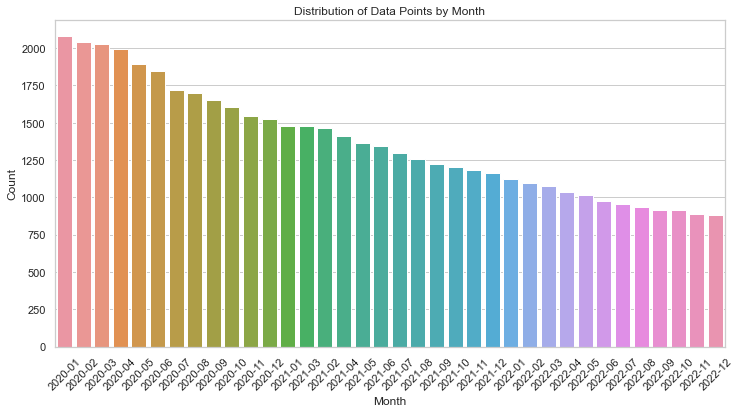

In [18]:
# Distribution of Data Points by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=geolocation_data, order = geolocation_data['month'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Data Points by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



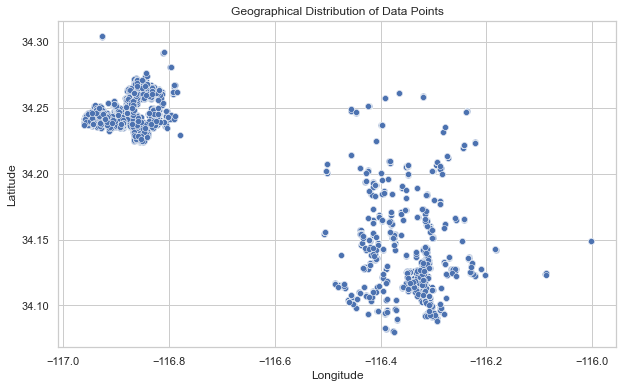

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=geolocation_data)
plt.title('Geographical Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [20]:
# Excluding cases where street name is not specified
filtered_streets = geolocation_data[geolocation_data['street_name'] != "Street name is not specified"]


# Analyzing the frequency of different street names in the filtered data
filtered_street_name_counts = filtered_streets['street_name'].value_counts()


# Displaying the top 5 most common street names in the filtered data
most_common_streets_filtered = filtered_street_name_counts.head(5)
print("Most Common Street Names (excluding 'Street name is not specified'):\n", most_common_streets_filtered)


# Displaying the 5 least common street names in the filtered data
least_common_streets_filtered = filtered_street_name_counts.tail(5)
print("\nLeast Common Street Names (excluding 'Street name is not specified'):\n", least_common_streets_filtered)


Most Common Street Names (excluding 'Street name is not specified'):
 Thrush Drive             413
Switzerland Drive        354
Starvation Flats Road    269
Villa Grove Avenue       227
Sheephorn Road           209
Name: street_name, dtype: int64

Least Common Street Names (excluding 'Street name is not specified'):
 Alta Avenue          4
Forest Hill Drive    3
Teakwood Drive       2
Crimson Circle       2
Glenwood Drive       1
Name: street_name, dtype: int64


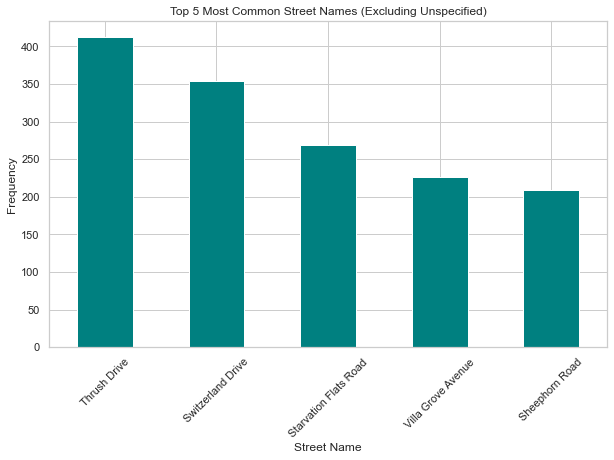

In [21]:
# Plotting the top 5 most common street names (excluding 'Street name is not specified')
plt.figure(figsize=(10, 6))
most_common_streets_filtered.plot(kind='bar', color='teal')
plt.title('Top 5 Most Common Street Names (Excluding Unspecified)')
plt.xlabel('Street Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



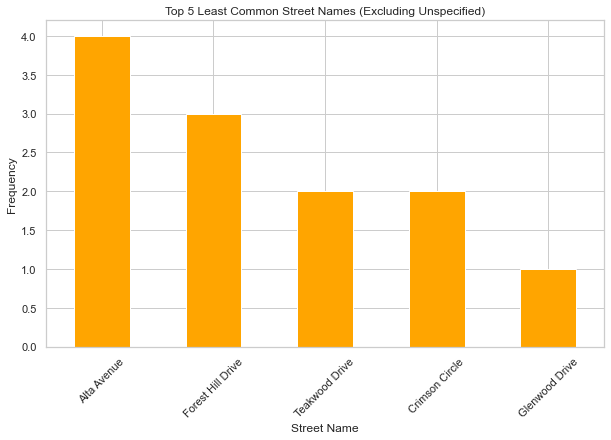

In [22]:
# Plotting the 5 least common street names (excluding 'Street name is not specified')
plt.figure(figsize=(10, 6))
least_common_streets_filtered.plot(kind='bar', color='orange')
plt.title('Top 5 Least Common Street Names (Excluding Unspecified)')
plt.xlabel('Street Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [23]:
amenities_path = "amenities.csv"

In [24]:
# Construct the file path using os.path.join
amenities_path = os.path.join(data_dir, "amenities.csv")

In [25]:
amenities_data = pd.read_csv(amenities_path, delimiter=';')

# Initial assessment of the ameities dataset
amenities_data.head()

,unified_id,month,hot_tub,pool
0,AIR10052559,2022-12,1,0
1,AIR10178668,2022-12,0,0
2,AIR10211700,2022-12,0,0
3,AIR10344705,2022-12,0,0
4,AIR10424683,2022-12,0,1


In [26]:
# Checking the transformed dataset
amenities_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unified_id  49311 non-null  object
 1   month       49311 non-null  object
 2   hot_tub     49311 non-null  int64 
 3   pool        49311 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [27]:
# Converting 'hot_tub' and 'pool' columns to integer type
amenities_data['hot_tub'] = amenities_data['hot_tub'].astype(int)
amenities_data['pool'] = amenities_data['pool'].astype(int)


In [28]:
amenities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unified_id  49311 non-null  object
 1   month       49311 non-null  object
 2   hot_tub     49311 non-null  int32 
 3   pool        49311 non-null  int32 
dtypes: int32(2), object(2)
memory usage: 1.1+ MB


In [29]:
# Calculate summary statistics for each column
summary_stats = amenities_data.describe()

# Calculate proportions of properties with and without hot tubs
hot_tub_counts = amenities_data['hot_tub'].value_counts()
hot_tub_proportion = hot_tub_counts / amenities_data.shape[0] * 100

# Calculate proportions of properties with and without pools
pool_counts = amenities_data['pool'].value_counts()
pool_proportion = pool_counts / amenities_data.shape[0] * 100

# Display summary statistics and proportions
print("Summary Statistics:")
print(summary_stats)
print("\nProportion of Properties with Hot Tub:")
print(hot_tub_proportion)
print("\nProportion of Properties with Pool:")
print(pool_proportion)

Summary Statistics:
            hot_tub          pool
count  49311.000000  49311.000000
mean       0.522115      0.081848
std        0.499516      0.274136
min        0.000000      0.000000
25%        0.000000      0.000000
50%        1.000000      0.000000
75%        1.000000      0.000000
max        1.000000      1.000000

Proportion of Properties with Hot Tub:
1    52.211474
0    47.788526
Name: hot_tub, dtype: float64

Proportion of Properties with Pool:
0    91.815214
1     8.184786
Name: pool, dtype: float64


# EDA : Amenities

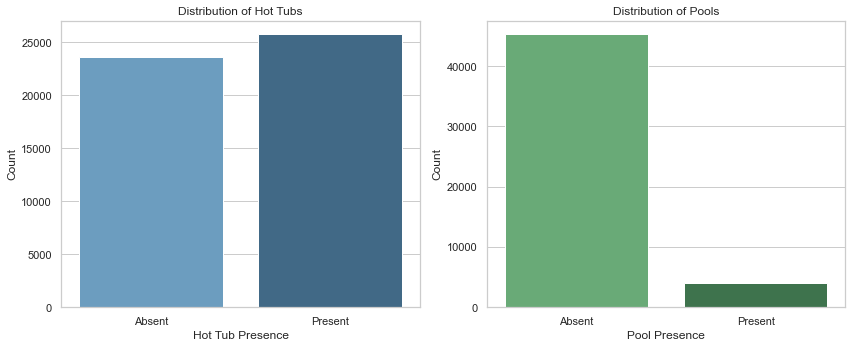

In [30]:
# Analyzing the distribution of hot tubs and pools
hot_tub_distribution = amenities_data['hot_tub'].value_counts()
pool_distribution = amenities_data['pool'].value_counts()

# Visualization
plt.figure(figsize=(12, 5))

# Plot for hot tub distribution
plt.subplot(1, 2, 1)
sns.barplot(x=hot_tub_distribution.index, y=hot_tub_distribution.values, palette="Blues_d")
plt.title('Distribution of Hot Tubs')
plt.xlabel('Hot Tub Presence')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absent', 'Present'])

# Plot for pool distribution
plt.subplot(1, 2, 2)
sns.barplot(x=pool_distribution.index, y=pool_distribution.values, palette="Greens_d")
plt.title('Distribution of Pools')
plt.xlabel('Pool Presence')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absent', 'Present'])

plt.tight_layout()
plt.show()


- The analysis highlights the prevalence disparity between hot tubs and pools, indicating a clear preference for hot tubs among the properties in the dataset. 

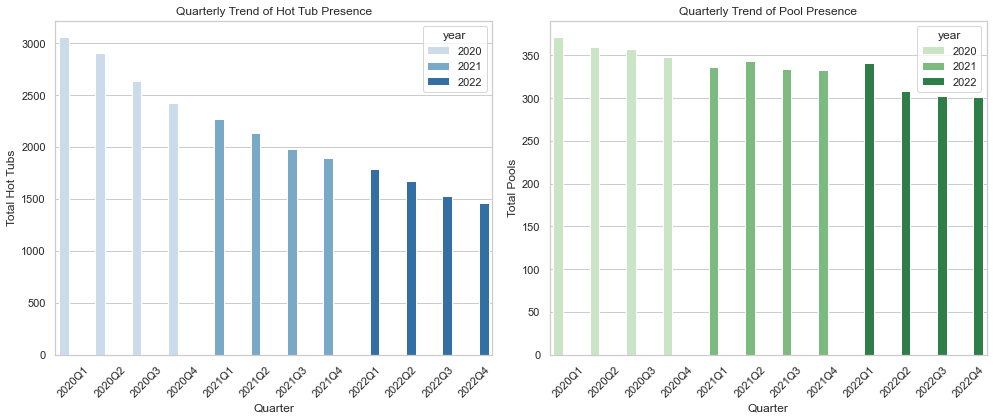

In [31]:
# Creating a new column for quarterly bins
# Assuming the 'month' format is 'YYYY-MM', we can extract the year and month to create quarters
amenities_data['year'] = amenities_data['month'].str[:4]
amenities_data['quarter'] = pd.to_datetime(amenities_data['month']).dt.to_period('Q')

# Grouping data by quarter and calculating the sum for hot tubs and pools
quarterly_amenities = amenities_data.groupby(['year', 'quarter'])[['hot_tub', 'pool']].sum().reset_index()

# Re-plotting with adjusted tick angles
plt.figure(figsize=(14, 6))

# Plot for hot tub trends by quarter
plt.subplot(1, 2, 1)
sns.barplot(x='quarter', y='hot_tub', hue='year', data=quarterly_amenities, palette='Blues')
plt.title('Quarterly Trend of Hot Tub Presence')
plt.xlabel('Quarter')
plt.ylabel('Total Hot Tubs')
plt.xticks(rotation=45)  # Rotating ticks

# Plot for pool trends by quarter
plt.subplot(1, 2, 2)
sns.barplot(x='quarter', y='pool', hue='year', data=quarterly_amenities, palette='Greens')
plt.title('Quarterly Trend of Pool Presence')
plt.xlabel('Quarter')
plt.ylabel('Total Pools')
plt.xticks(rotation=45)  # Rotating ticks

plt.tight_layout()
plt.show()

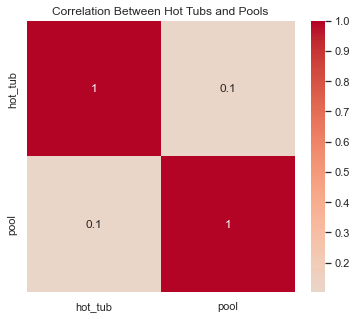

In [32]:
# Correlation analysis between hot tubs and pools
correlation = amenities_data[['hot_tub', 'pool']].corr()

# Visualization of the correlation
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Hot Tubs and Pools')
plt.show()

In [33]:
market_analysis_path = "market_analysis.csv"

In [34]:
# Construct the file path using os.path.join
market_analysis_path = os.path.join(data_dir, "market_analysis.csv")

In [35]:
# Reading the file using semicolon as the delimiter and handling comma in numbers
market_analysis_data = pd.read_csv(market_analysis_path, delimiter=';', decimal=',')

# Initial assessment of the corrected market analysis dataset
market_analysis_data.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,10000347,2020-1,92315,Big Bear Lake,2-5 Units,3,2,10,899.959992,31,0.064516,449.979996,52.0,3.0
1,10000347,2020-10,92315,Big Bear Lake,2-5 Units,3,2,10,13950.000000,31,1.000000,450.000000,NaN,NaN
2,10000347,2020-11,92315,Big Bear Lake,2-5 Units,3,2,10,13500.000000,30,1.000000,450.000000,NaN,NaN
3,10000347,2020-12,92315,Big Bear Lake,2-5 Units,3,2,10,13950.000000,31,1.000000,450.000000,NaN,NaN
4,10000347,2020-2,92315,Big Bear Lake,2-5 Units,3,2,10,450.000000,29,0.034483,450.000000,8.0,1.0


In [36]:
market_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116619 entries, 0 to 116618
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unified_id    116619 non-null  int64  
 1   month         116619 non-null  object 
 2   zipcode       116619 non-null  int64  
 3   city          116619 non-null  object 
 4   host_type     116619 non-null  object 
 5   bedrooms      116619 non-null  int64  
 6   bathrooms     116619 non-null  object 
 7   guests        116619 non-null  object 
 8   revenue       116613 non-null  float64
 9   openness      116619 non-null  int64  
 10  occupancy     116619 non-null  float64
 11  nightly rate  93146 non-null   float64
 12  lead time     86025 non-null   float64
 13  length stay   86025 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 12.5+ MB


In [37]:
# Summary statistics of the numerical columns
numerical_summary = market_analysis_data.describe()

numerical_summary

,unified_id,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay
count,1.166190e+05,116619.000000,116619.000000,116613.000000,116619.000000,116619.000000,93146.000000,86025.000000,86025.000000
mean,4.391803e+16,92305.000429,3.401538,5745.195040,28.334217,0.438305,451.617793,34.262351,5.243706
std,1.609115e+17,20.624257,0.633803,7264.663998,6.164065,0.345929,341.985164,39.568512,17.170159
min,5.874800e+04,92252.000000,3.000000,0.000000,1.000000,0.000000,10.000000,1.000000,1.000000
25%,2.229672e+07,92314.000000,3.000000,796.000000,30.000000,0.100000,241.462225,10.857143,2.000000
50%,4.011635e+07,92315.000000,3.000000,3811.000000,30.000000,0.419355,356.000000,22.916667,2.500000
75%,4.802902e+07,92315.000000,4.000000,8000.000000,31.000000,0.741935,554.737500,43.000000,3.250000
max,7.930037e+17,92315.000000,5.000000,151900.000000,31.000000,1.000000,10000.000000,364.000000,365.000000


In [38]:
market_analysis_data.isnull().sum()

unified_id          0
month               0
zipcode             0
city                0
host_type           0
bedrooms            0
bathrooms           0
guests              0
revenue             6
openness            0
occupancy           0
nightly rate    23473
lead time       30594
length stay     30594
dtype: int64

In [39]:
# Remove rows with missing values in the 'revenue' column
market_analysis_data = market_analysis_data.dropna(subset=['revenue'])

# Verify that the rows with missing values in the 'revenue' column have been removed
print(market_analysis_data.isnull().sum())

unified_id          0
month               0
zipcode             0
city                0
host_type           0
bedrooms            0
bathrooms           0
guests              0
revenue             0
openness            0
occupancy           0
nightly rate    23467
lead time       30588
length stay     30588
dtype: int64


In [40]:
# Calculate the mean of specific columns
mean_values = market_analysis_data[['nightly rate', 'lead time', 'length stay']].mean()

# Fill missing values in specific columns with their respective means
market_analysis_data['nightly rate'] = market_analysis_data['nightly rate'].fillna(mean_values['nightly rate'])
market_analysis_data['lead time'] = market_analysis_data['lead time'].fillna(mean_values['lead time'])
market_analysis_data['length stay'] = market_analysis_data['length stay'].fillna(mean_values['length stay'])

In [41]:
market_analysis_data.isnull().sum()

unified_id      0
month           0
zipcode         0
city            0
host_type       0
bedrooms        0
bathrooms       0
guests          0
revenue         0
openness        0
occupancy       0
nightly rate    0
lead time       0
length stay     0
dtype: int64

# EDA: Revenue and Occpancy

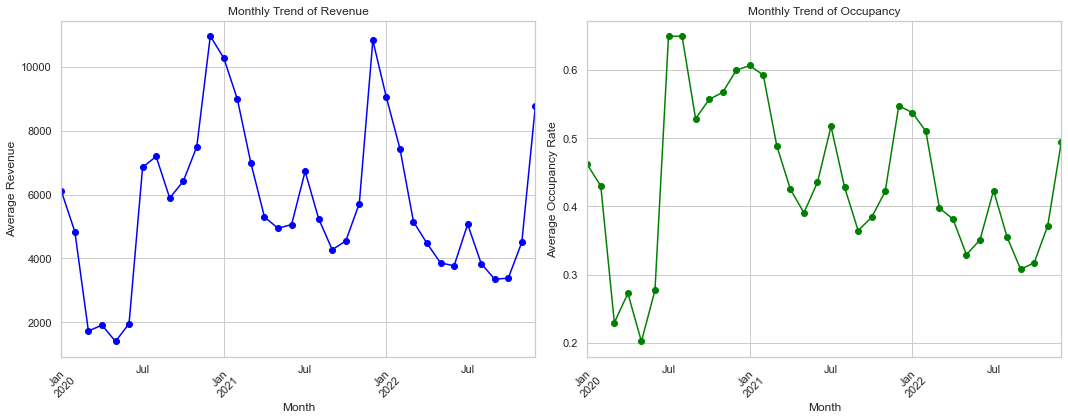

In [42]:
# Ensure 'month' column is in datetime format
market_analysis_data['month'] = pd.to_datetime(market_analysis_data['month'], format='%Y-%m')

# Extracting only the relevant numerical columns for monthly trend analysis
numerical_columns = ['revenue', 'occupancy', 'nightly rate', 'lead time', 'length stay']

# Grouping data by month and calculating the mean for the selected numerical columns
monthly_trends_numerical = market_analysis_data.groupby(market_analysis_data['month'].dt.to_period('M'))[numerical_columns].mean()

# Visualization
plt.figure(figsize=(15, 6))

# Plot for monthly trend of revenue
plt.subplot(1, 2, 1)
monthly_trends_numerical['revenue'].plot(kind='line', marker='o', color='blue')
plt.title('Monthly Trend of Revenue')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for monthly trend of occupancy
plt.subplot(1, 2, 2)
monthly_trends_numerical['occupancy'].plot(kind='line', marker='o', color='green')
plt.title('Monthly Trend of Occupancy')
plt.xlabel('Month')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


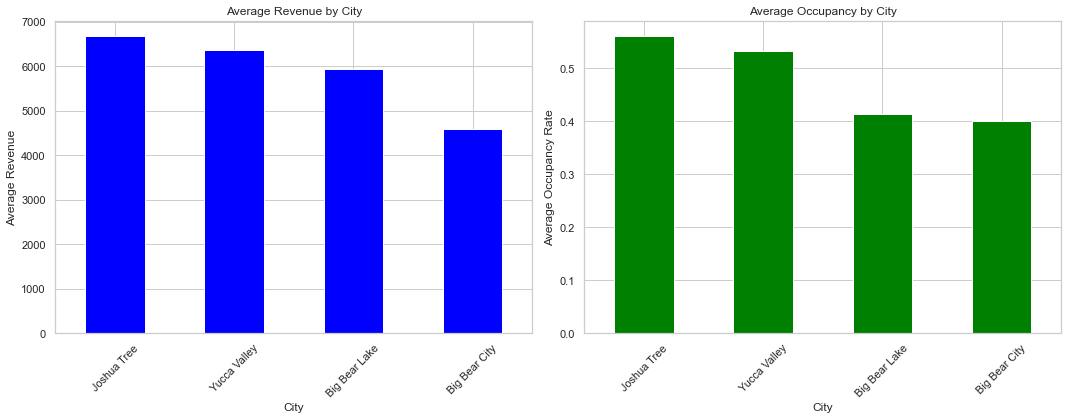

In [43]:
# Grouping data by city and calculating the mean for revenue and occupancy
city_trends = market_analysis_data.groupby('city')[['revenue', 'occupancy']].mean().sort_values(by='revenue', ascending=False)

# Visualization
plt.figure(figsize=(15, 6))

# Plot for average revenue by city
plt.subplot(1, 2, 1)
city_trends['revenue'].plot(kind='bar', color='blue')
plt.title('Average Revenue by City')
plt.xlabel('City')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for average occupancy by city
plt.subplot(1, 2, 2)
city_trends['occupancy'].plot(kind='bar', color='green')
plt.title('Average Occupancy by City')
plt.xlabel('City')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

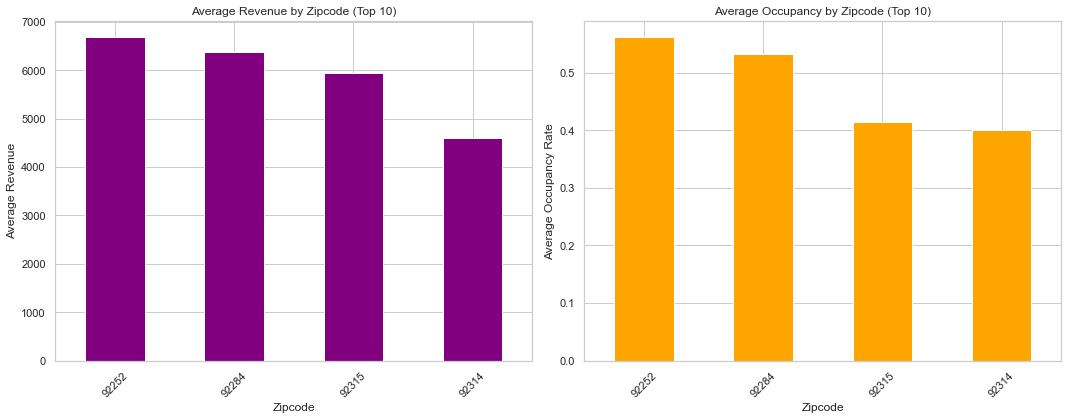

In [44]:
# Grouping data by zipcode and calculating the mean for revenue and occupancy
zipcode_trends = market_analysis_data.groupby('zipcode')[['revenue', 'occupancy']].mean().sort_values(by='revenue', ascending=False)

# Selecting top zip codes for visualization (for clarity in the plot)
top_zipcodes = zipcode_trends.head(10)

# Visualization
plt.figure(figsize=(15, 6))

# Plot for average revenue by zipcode
plt.subplot(1, 2, 1)
top_zipcodes['revenue'].plot(kind='bar', color='purple')
plt.title('Average Revenue by Zipcode (Top 10)')
plt.xlabel('Zipcode')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for average occupancy by zipcode
plt.subplot(1, 2, 2)
top_zipcodes['occupancy'].plot(kind='bar', color='orange')
plt.title('Average Occupancy by Zipcode (Top 10)')
plt.xlabel('Zipcode')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


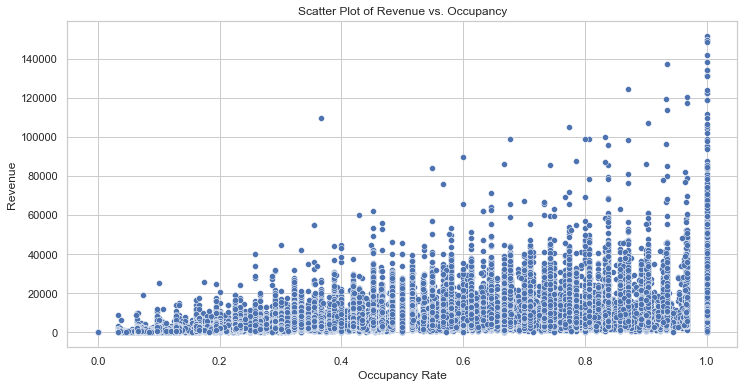

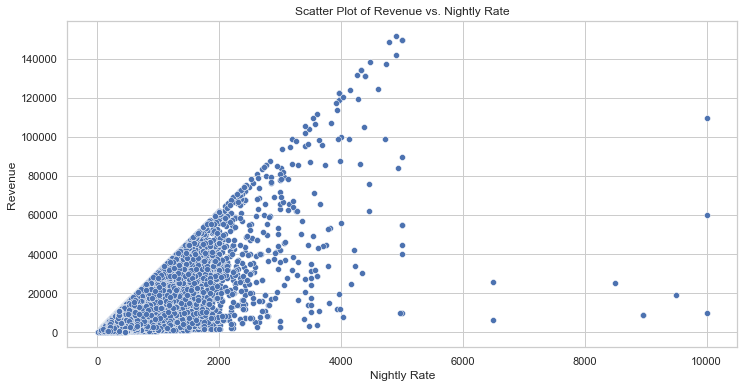

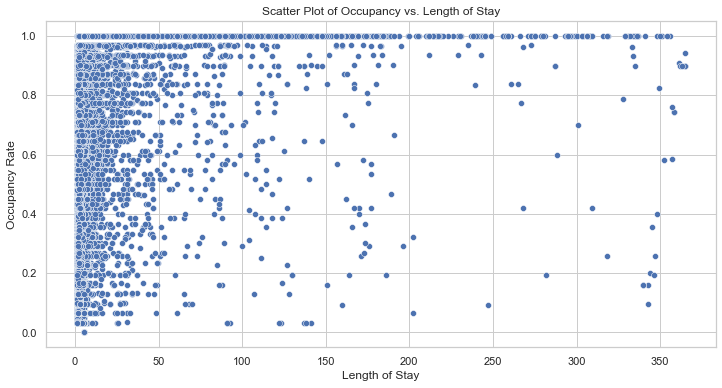

In [45]:
import seaborn as sns

# Scatter plot for Revenue vs. Occupancy
plt.figure(figsize=(12, 6))
sns.scatterplot(x='occupancy', y='revenue', data=market_analysis_data)
plt.title('Scatter Plot of Revenue vs. Occupancy')
plt.xlabel('Occupancy Rate')
plt.ylabel('Revenue')
plt.show()

# Scatter plot for Revenue vs. Nightly Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='nightly rate', y='revenue', data=market_analysis_data)
plt.title('Scatter Plot of Revenue vs. Nightly Rate')
plt.xlabel('Nightly Rate')
plt.ylabel('Revenue')
plt.show()

# Scatter plot for Occupancy vs. Length of Stay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='length stay', y='occupancy', data=market_analysis_data)
plt.title('Scatter Plot of Occupancy vs. Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Occupancy Rate')
plt.show()
